# Question 2 : Binary Classification Using AdaLine Algorithm


<ul>
<li>The first category has 100 (x,y) points such that $x \sim \mathcal{N}(\mu = 2,\,\sigma^{2} = 0.25)\, 
$ and $y \sim \mathcal{N}(\mu = 0,\,\sigma^{2} = 0.04)\,$.</li>
<li>The second category has 30 (x,y) points such that $x \sim \mathcal{N}(\mu = 0,\,\sigma^{2} = 0.01)\, 
$ and $y \sim \mathcal{N}(\mu = 1,\,\sigma^{2} = 0.49)\,$.</li>
</ul>


## Tasks

<ul>
<li>Part A : Train the Neural Network using AdaLine Algorithm that can seperate these two categories. Plot the changes in the error ${(t-net)}^{2}/2$.</li>
<li>Part B : Is AdaLine Algorithm good for seperating the two categories? If not, give a better solution.</li>
</ul>

## Adaptive Linear Unit (AdaLine)

<img src="images/Q2-AdaLineArch.png" width = 800>

## Learning Algorithm for AdaLine

<img src="images/Q2-LearningRule.png" width = 800>
<img src="images/Q2-LearningAlgorithm.png" width = 800>

## Making the Data

In [35]:
import numpy as np
import pandas as pd

In [36]:
x1 = np.random.normal(2, 0.5, 100).reshape(-1,1)
y1 = np.random.normal(0, 0.2, 100).reshape(-1,1)
A = pd.DataFrame(np.concatenate((x1, y1), axis=1), columns=['x','y'])
A['label'] = -1

x2 = np.random.normal(0, 0.1, 30).reshape(-1,1)
y2 = np.random.normal(1, 0.7, 30).reshape(-1,1)
B = pd.DataFrame(np.concatenate((x2, y2), axis=1), columns=['x','y'])
B['label'] = 1

df = pd.concat([A,B], axis = 0)

In [37]:
df

,x,y,label
0,1.352529,0.240082,-1
1,1.947441,0.363218,-1
2,1.002519,-0.022186,-1
3,1.349904,0.195262,-1
4,2.771534,-0.290570,-1
...,...,...,...
25,-0.000330,1.145252,1
26,0.237433,2.430324,1
27,0.101453,2.133729,1
28,-0.044050,1.653108,1


## Plotting the Dataset

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

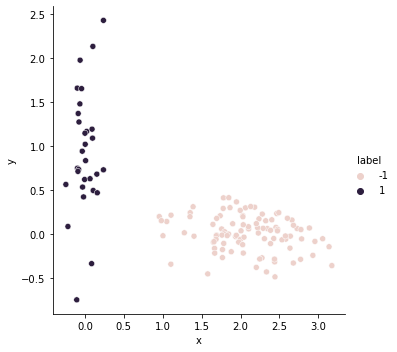

In [39]:
sns.relplot(x="x", y="y", hue="label", data=df);

As you can see, these 2 categories are linearly separable.

## Implementation

In [40]:
class AdaLineNetwork() :
    
    def __init__(self, in_features, out_features, seed = 42) :
        #Seed
        np.random.seed(seed)

        self.in_features = in_features
        self.out_features = out_features
        # Initialize Weights & Biases
        self.init_wad()
        
    # Initialize Weights & Biases
    def init_wad(self) :
        self.weights = np.random.uniform(low=-1, high=1, size=(in_features*out_features,)).reshape(out_features,-1)
        self.biases = np.random.uniform(low=-1, high=1, size=(out_features,))
        
        #Learning Rate
        self.lr = 0.01
        
    def h(self,num) :
        if num >= 0 :
            return 1
        else :
            return -1
    def forward(self, x) :
        net = np.matmul(self.weights,x)+self.biases
        prediction = pd.Series(np.matmul(self.weights,x)+self.biases)
        prediction = prediction.apply(self.h).values
        return prediction,net
    
    def backward(self,t, net, xi) :
        self.weights = self.weights + self.lr*(t-net)*xi
        self.biases = self.biases + self.lr*(t-net)
        
    def train(self,df,epochs = 1) :
        error_per_epoch = []
        for epoch in range(0,epochs):
            # Evaluate
            error_per_epoch.append(self.evaluate(df))
            
            for index, row in df.iterrows():
                # Forward Propagation
                prediction,net = self.forward(row[['x','y']].values)
                # Backpropagation
                self.backward(row['label'],net,row[['x','y']].values)
        
        return error_per_epoch
                
    def calc_error(self,target,net) :
        return (np.square(target-net)/2)
    
    def evaluate(self,df) :
        error = 0
        for index, row in df.iterrows():
            #Forward Propagation
            t,net = self.forward(row[['x','y']].values)
            error += model.calc_error(t,net)[0]
        
        return error
    
    def predict(self,df) :
        result = []
        for index, row in df.iterrows() :
            target,net =  self.forward(row[['x','y']].values)
            result.append(target[0])
        
        return result
            

## Intializing the model

This is a binary classification problem. So we need only 1 output neuron.

In [41]:
in_features = 2
out_features = 1
model = AdaLineNetwork(in_features, out_features)
print(model.weights)
print(model.biases)

[[-0.25091976  0.90142861]]
[0.46398788]


# Part A

## Training

In [42]:
epochs_ = 5
loss_per_epoch = model.train(df, epochs = epochs_)

### Plot the loss function

In [43]:
loss_per_epoch


[40.166856456351866,
 9.32674990310659,
 8.73975544329238,
 8.69784143134417,
 8.750909005772561]

In [44]:
print(model.weights)
print(model.biases)

[[-0.50939281  0.5340748 ]]
[0.25257873]


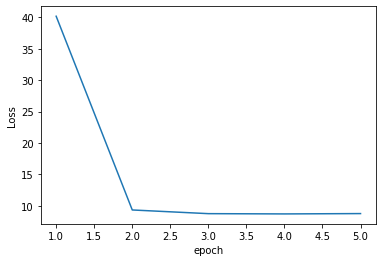

In [45]:
plt.plot(range(1,epochs_+1), loss_per_epoch)
plt.ylabel('Loss');
plt.xlabel('epoch');

As you cna see After 4 epochs our model learns the weights and bias of the separator line.

## Plotting the separator line
Let's plot the separator line that our model learned.

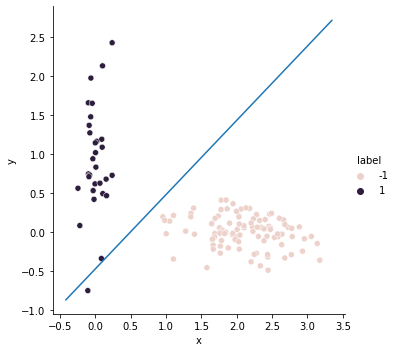

In [46]:
sns.relplot(x="x", y="y", hue="label", data=df)
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-')


slope = (-1)*(model.weights[0][0]/model.weights[0][1])

intercept = (-1)*(model.biases[0]/model.weights[0][1])

abline(slope,intercept)
# model.biases

## Evaluating the Model

In [47]:
np.unique(np.array(model.predict(df)), return_counts=True)

(array([-1,  1]), array([101,  29]))

In [48]:
from sklearn.metrics import classification_report
y_pred = model.predict(df)
y_true = df['label'].values
print(classification_report(y_true, y_pred, labels=[-1,1]))

              precision    recall  f1-score   support

          -1       0.99      1.00      1.00       100
           1       1.00      0.97      0.98        30

    accuracy                           0.99       130
   macro avg       1.00      0.98      0.99       130
weighted avg       0.99      0.99      0.99       130



# Part B : Is AdaLine Algorithm good for seperating the two categories?

The F1-Score of this model is 0.99, which is reasonable. But a perfect lines exists and this model is unable to find it. So AdaLine is not a good choice for this question.

### Solution
The solution is to replace the “sign” function with a “soft sign” such as “tanh”. Unlike “sign”, “tanh” is smooth and one can compute the new updating rules by Gradient Descent.

<img src="images/Q2-ActivationFunc.png" width="500">

$\gamma$ should be chosen big because “tanh” will be near to a “sign” function. Now, by decreasing the loss function, the output of network will converge to the target value.